# Visualise location information

ggtree v3.16.0 Learn more at https://yulab-smu.top/contribution-tree-data/

Please cite:

Shuangbin Xu, Lin Li, Xiao Luo, Meijun Chen, Wenli Tang, Li Zhan, Zehan
Dai, Tommy T. Lam, Yi Guan, Guangchuang Yu. Ggtree: A serialized data
object for visualization of a phylogenetic tree and annotation data.
iMeta 2022, 1(4):e56. doi:10.1002/imt2.56


Attaching package: ‘ggtree’


The following object is masked from ‘package:ape’:

    rotate



Attaching package: ‘dplyr’


The following object is masked from ‘package:ape’:

    where


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘tidyr’


The following object is masked from ‘package:ggtree’:

    expand


Rows: 3084 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): tube_code
dbl (4): PATIENT_ID, death_7_day, death_14_day, death_30_day

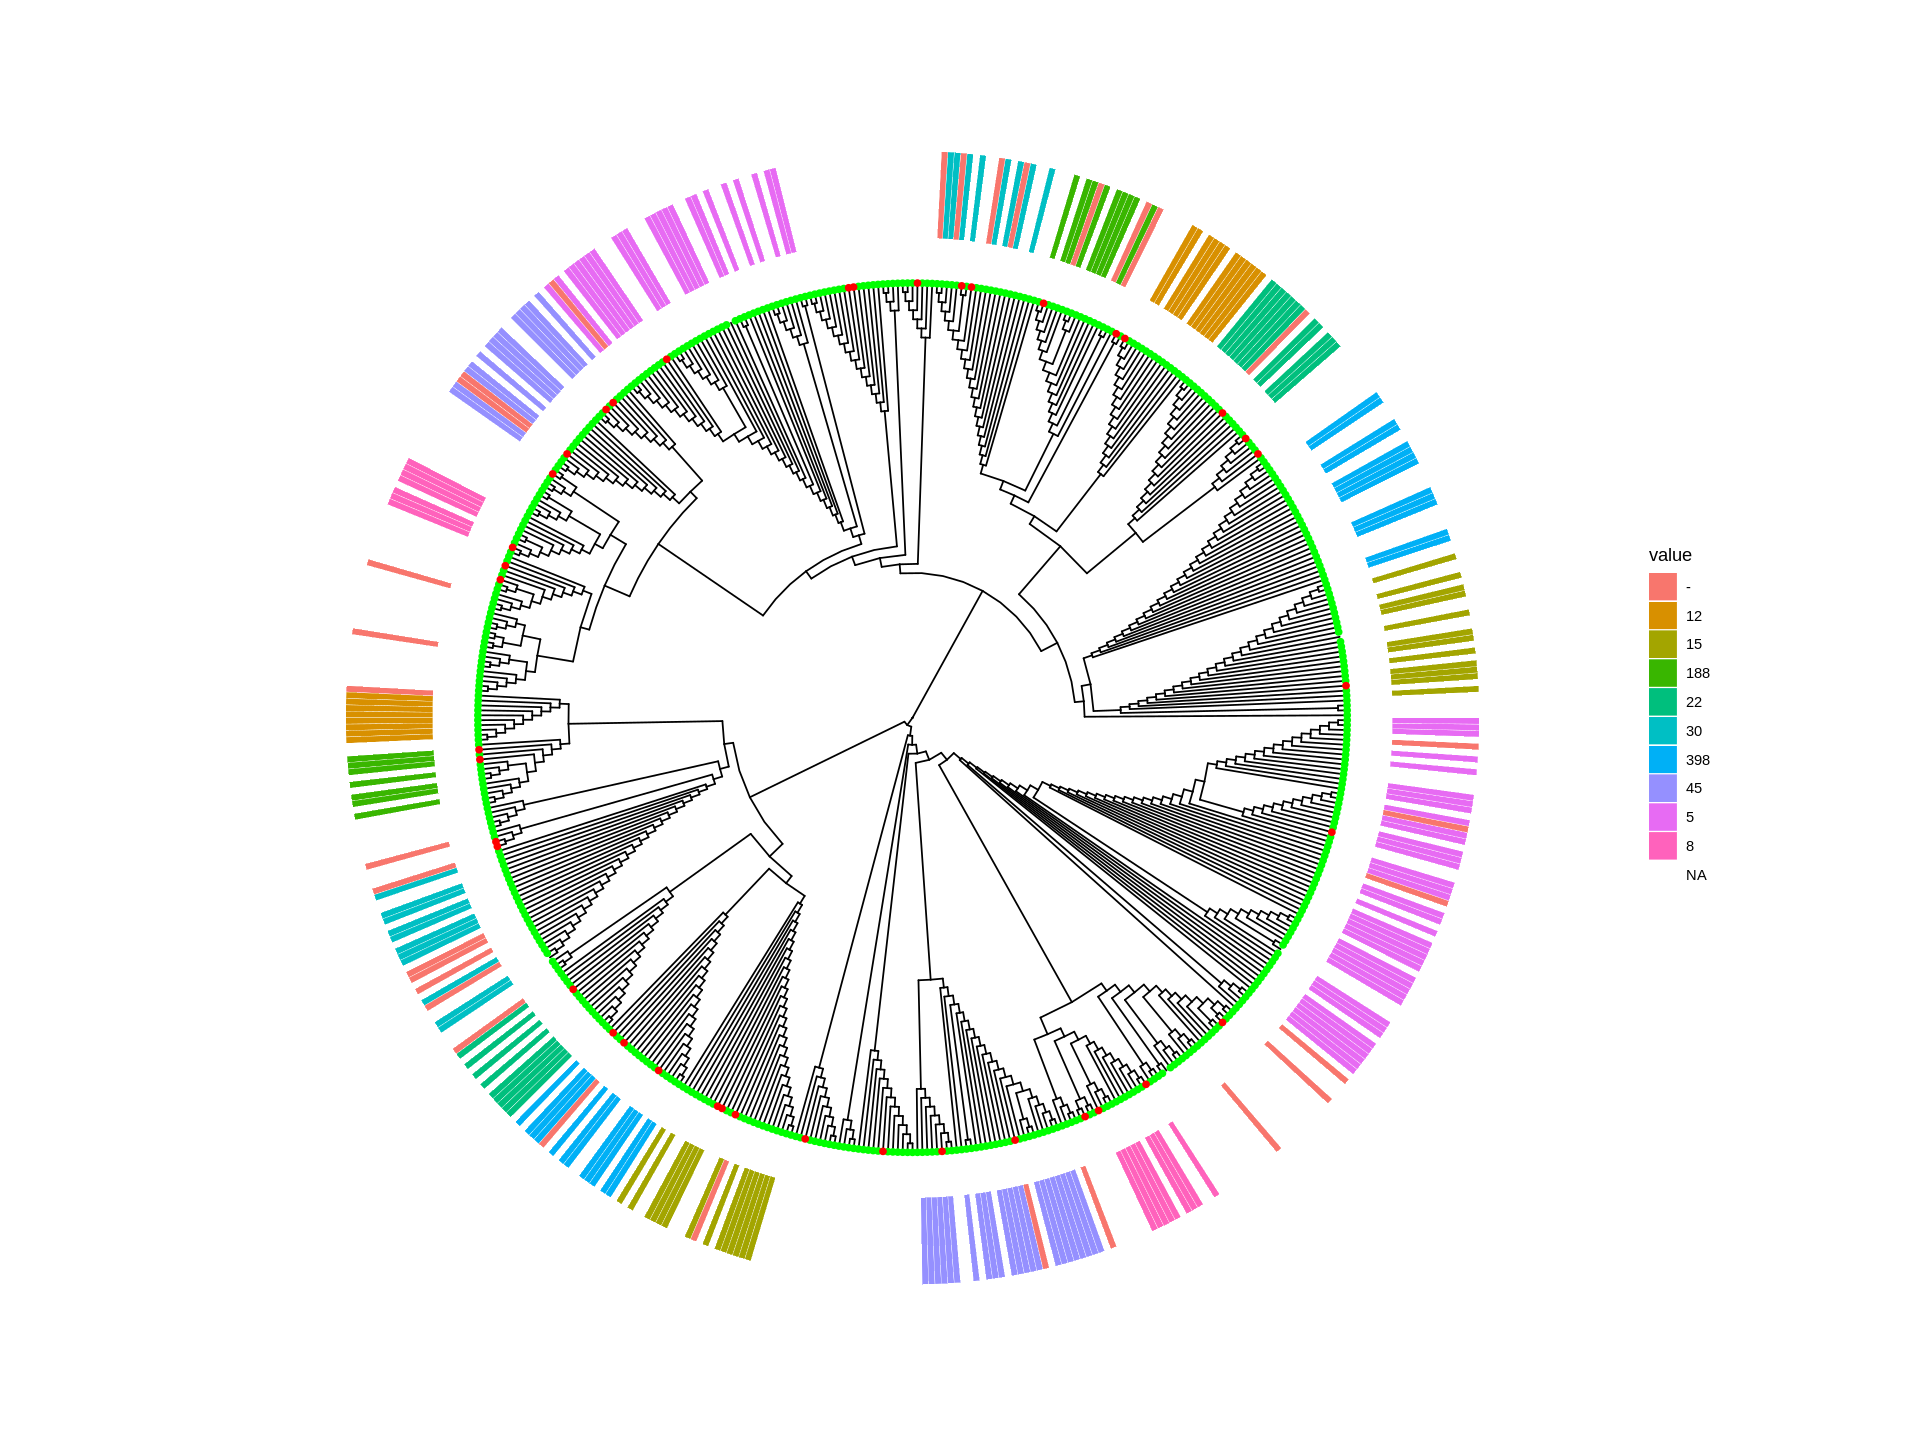

In [1]:
options(repr.plot.width = 16, repr.plot.height = 12)

library(ape)
library(ggtree)
library(ggplot2)
library(dplyr)
library(readr)
library(tidyr)

tree <- read.tree(
  "~/workspace/genome_data/annotations/s_aureus/gene_sequences/ess_system/tree.nwk"
)

mortality_df <- read_csv(
  "~/workspace/ehr_data/data/full_cohort/tube_id_mortality_labels.csv"
)

mlst_df <- read_csv(
  "~/workspace/genome_data/annotations/s_aureus/mlst/mlst_saur.csv"
)

df <- data.frame(tube_code = tree$tip.label)

p <- ggtree(tree, branch.length = "none")

tree_data <- p$data

tree_data <- tree_data %>%
  mutate(tip = ifelse(isTip, label, NA))

tree_data <- left_join(tree_data, mortality_df, by = c("tip" = "tube_code"))

tree_data$death_7_day_color <- ifelse(
  tree_data$isTip, ifelse(tree_data$death_7_day == "1", "red", "green"), "black"
)

heatmap_data <- df %>%
  left_join(mlst_df, by = "tube_code")

circ <- ggtree(tree, layout = "circular", branch.length = "none")

rownames(heatmap_data) <- heatmap_data$tube_code

p <- gheatmap(
  circ,
  heatmap_data %>% select(mlst_type),
  offset = .2,
  width = .2,
  colnames = FALSE
) %<+% tree_data +
  geom_tippoint(aes(color = I(death_7_day_color)))

p

Rows: 367 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): species, mlst_type, tube_code, arcC, aroE, glpF, gmk, pta, tpi, yqiL

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for fill is already present.
Adding 

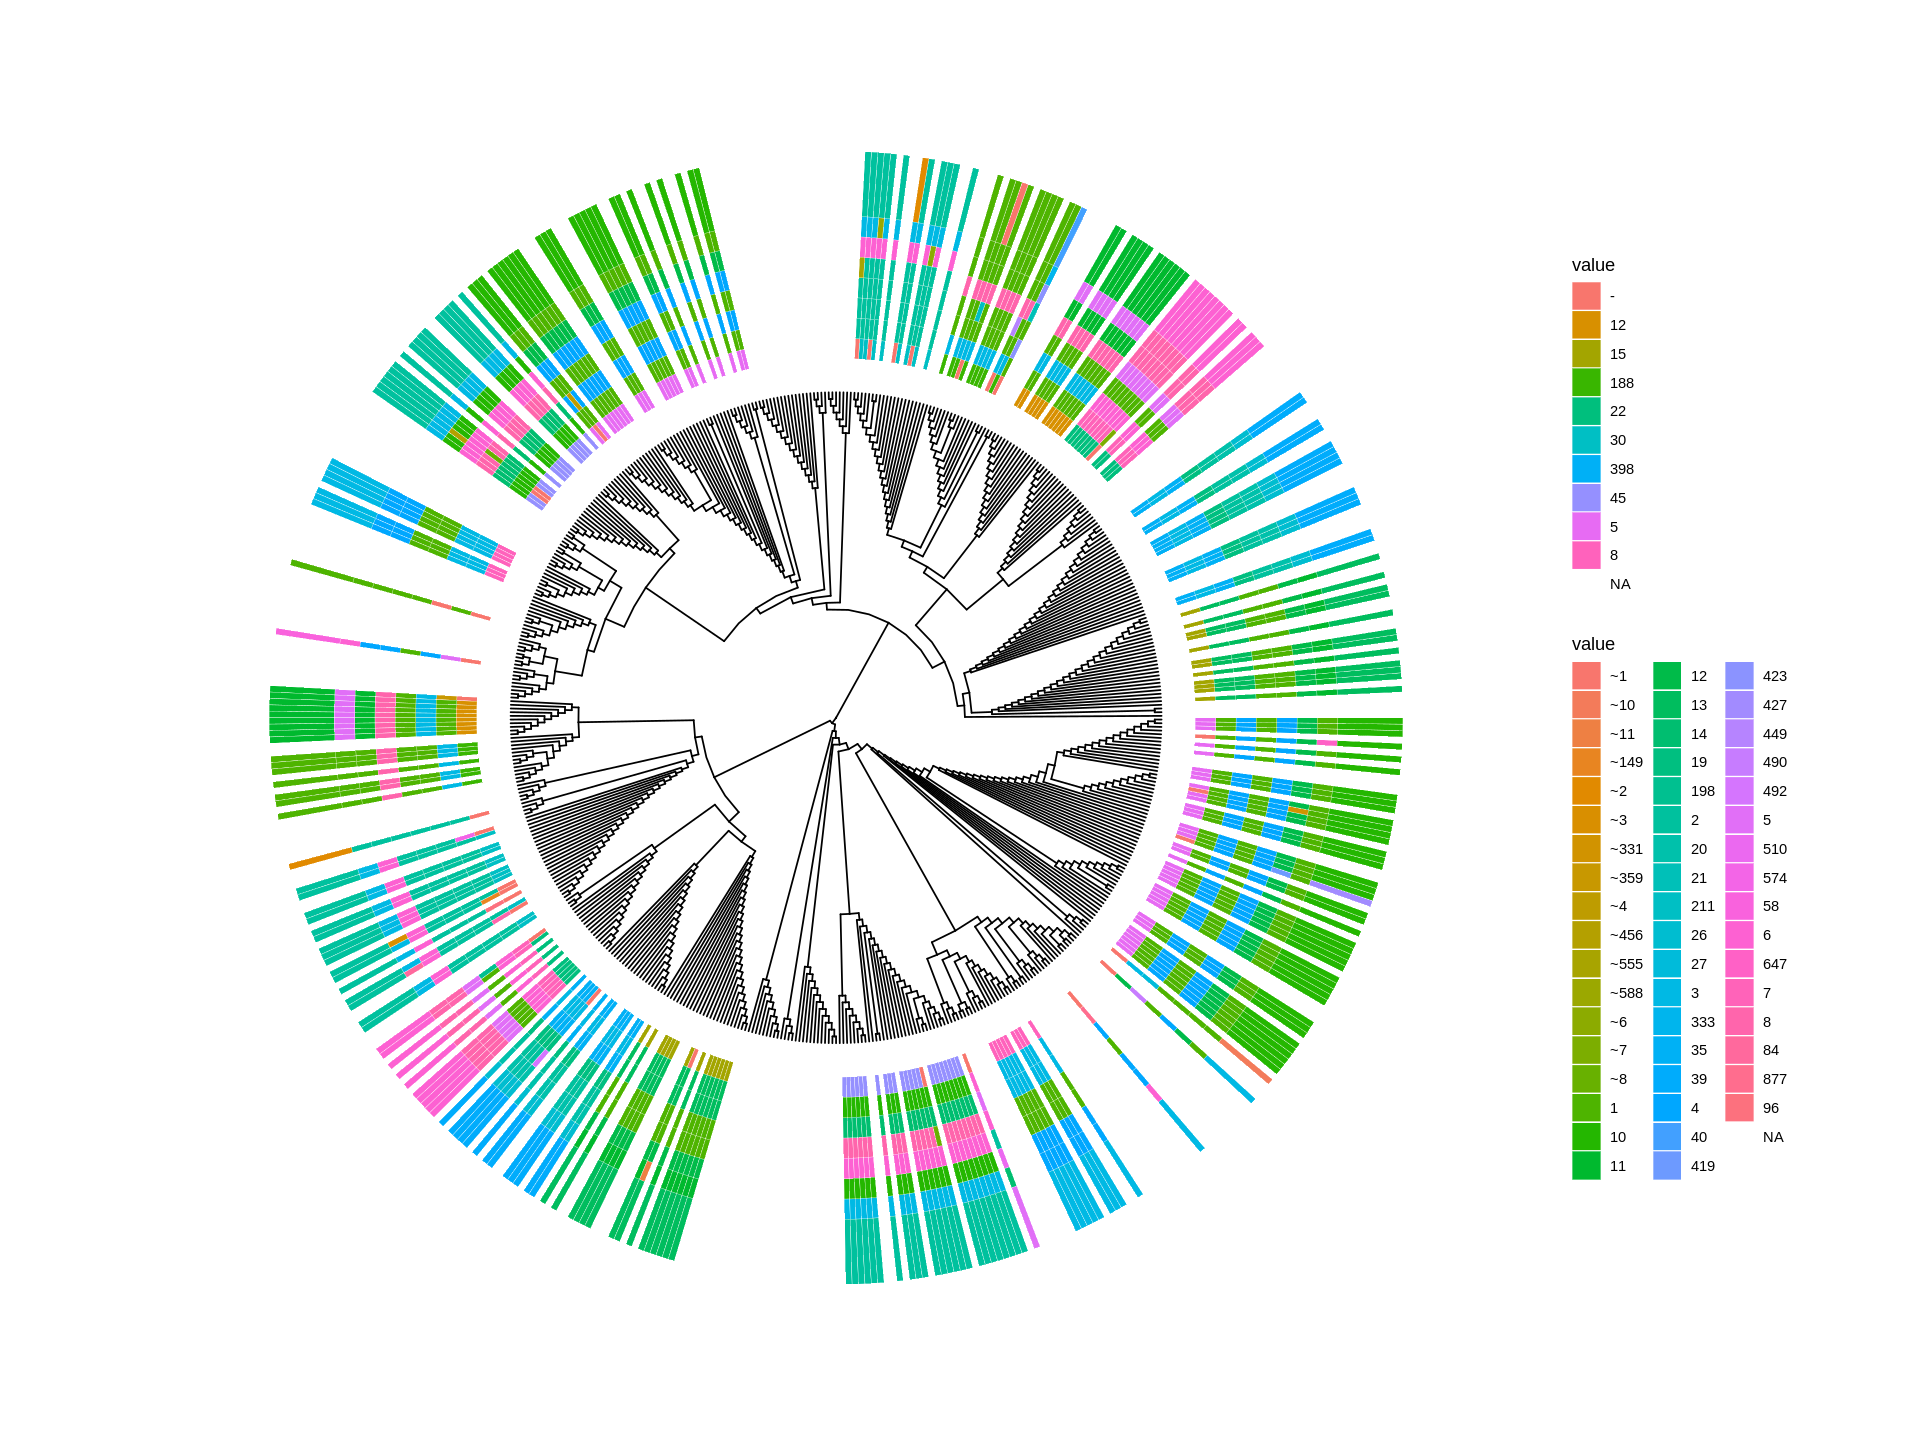

In [2]:
options(repr.plot.width = 16, repr.plot.height = 12)

library(ape)
library(ggtree)
library(ggplot2)
library(dplyr)
library(readr)
library(tidyr)
library(ggnewscale)

tree <- read.tree(
  "~/workspace/genome_data/annotations/s_aureus/gene_sequences/ess_system/tree.nwk"
)

mlst_df <- read_csv(
  "~/workspace/genome_data/annotations/s_aureus/mlst/mlst_saur.csv"
)

df <- data.frame(tube_code = tree$tip.label)

heatmap_data <- df %>%
  left_join(mlst_df, by = "tube_code")

circ <- ggtree(tree, layout = "circular", branch.length = "none")

rownames(heatmap_data) <- heatmap_data$tube_code

p <- gheatmap(
  circ,
  heatmap_data %>% select(mlst_type),
  offset = .2,
  width = .2,
  colnames = FALSE
) +
  new_scale_fill()

p <- gheatmap(
  p,
  heatmap_data %>% select(arcC),
  offset = 3.2,
  width = .2,
  colnames = FALSE
)

p <- gheatmap(
  p,
  heatmap_data %>% select(aroE),
  offset = 6.2,
  width = .2,
  colnames = FALSE
)

p <- gheatmap(
  p,
  heatmap_data %>% select(glpF),
  offset = 9.2,
  width = .2,
  colnames = FALSE
)

p <- gheatmap(
  p,
  heatmap_data %>% select(gmk),
  offset = 12.2,
  width = .2,
  colnames = FALSE
)

p <- gheatmap(
  p,
  heatmap_data %>% select(pta),
  offset = 15.2,
  width = .2,
  colnames = FALSE
)

p <- gheatmap(
  p,
  heatmap_data %>% select(tpi),
  offset = 18.2,
  width = .2,
  colnames = FALSE
)

p <- gheatmap(
  p,
  heatmap_data %>% select(yqiL),
  offset = 21.2,
  width = .2,
  colnames = FALSE
)

p